## Introduction


Lets analyse the most trending videos on Youtube across all around the world to get significant insights.

## Questions


-How long usually a video can trend in different countries? (Done)

-How many likes, dislikes, views and comments get by different countries? (Done)

-Correlation of trending video in between countries 

-Videos from which category has longer trend?

-Correlation between Days of Publish to Trend v/s Trending Duration

-Users like videos from which CATEGORY the most? (Done)

-What is the ratio of Likes-Dislikes and Views-Comments in different categories?

-What's the most discuss words for each category? (Done)



## Import Libraries

In [165]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from datetime import datetime
import json
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

## Import Data

In [3]:
files = ['USvideos.csv', 'INvideos.csv', 'DEvideos.csv','GBvideos.csv', 'CAvideos.csv']

dfs = list()
for csv in files:
    df = pd.read_csv(csv, index_col='video_id')
    df['country'] = csv[:2]

    dfs.append(df)

all_df = pd.concat(dfs)
all_df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


We see that trending_data and publish_time are not yet in the correct format of datetime data.

In [4]:
all_df['trending_date'] = pd.to_datetime(all_df['trending_date'], format= '%y.%d.%m')
all_df['trending_date']

video_id
2kyS6SvSYSE   2017-11-14
1ZAPwfrtAFY   2017-11-14
5qpjK5DgCt4   2017-11-14
puqaWrEC7tY   2017-11-14
d380meD0W0M   2017-11-14
                 ...    
sGolxsMSGfQ   2018-06-14
8HNuRNi8t70   2018-06-14
GWlKEM3m2EE   2018-06-14
lbMKLzQ4cNQ   2018-06-14
POTgw38-m58   2018-06-14
Name: trending_date, Length: 198938, dtype: datetime64[ns]

In [5]:
all_df['publish_time'] = pd.to_datetime(all_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
all_df['publish_time'] 

video_id
2kyS6SvSYSE   2017-11-13 17:13:01
1ZAPwfrtAFY   2017-11-13 07:30:00
5qpjK5DgCt4   2017-11-12 19:05:24
puqaWrEC7tY   2017-11-13 11:00:04
d380meD0W0M   2017-11-12 18:01:41
                      ...        
sGolxsMSGfQ   2018-06-13 18:00:07
8HNuRNi8t70   2018-06-13 19:01:18
GWlKEM3m2EE   2018-06-11 17:30:53
lbMKLzQ4cNQ   2018-06-13 04:00:05
POTgw38-m58   2018-06-13 16:00:03
Name: publish_time, Length: 198938, dtype: datetime64[ns]

In [6]:
all_df.insert(4, 'publish_date', all_df['publish_time'].dt.date)
all_df['publish_time'] = all_df['publish_time'].dt.hour
all_df[['publish_date', 'publish_time']].head()

,publish_date,publish_time
video_id,,
2kyS6SvSYSE,2017-11-13,17
1ZAPwfrtAFY,2017-11-13,7
5qpjK5DgCt4,2017-11-12,19
puqaWrEC7tY,2017-11-13,11
d380meD0W0M,2017-11-12,18


In [7]:
#We keep two sets data here:

#first one is data set sorted according to trending date
all_df_full = all_df.reset_index().sort_values('trending_date').set_index('video_id')

#second one that keeps last video if it is dıblciated because of the latest status
all_data = all_df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')

#burada indexi kolona alıp tarih sıralaması yapmadan daha kısa bir yoldan tekrar eden değerleri düşürebilirim:
# all_df_full[~all_df_full.index.duplicated(keep='last')]

all_data.index.duplicated().any()


False

In [48]:
all_data = all_data.drop(index = '#NAME?')
all_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 69264 entries, JdHovvb0KD4 to POTgw38-m58
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           69264 non-null  datetime64[ns]
 1   title                   69264 non-null  object        
 2   channel_title           69264 non-null  object        
 3   category_id             69264 non-null  int64         
 4   publish_date            69264 non-null  object        
 5   publish_time            69264 non-null  int64         
 6   tags                    69264 non-null  object        
 7   views                   69264 non-null  int64         
 8   likes                   69264 non-null  int64         
 9   dislikes                69264 non-null  int64         
 10  comment_count           69264 non-null  int64         
 11  thumbnail_link          69264 non-null  object        
 12  comments_disabled       69264 non-n

In [26]:
all_df_full = all_df_full.drop(index = '#NAME?')
all_df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198427 entries, 2kyS6SvSYSE to POTgw38-m58
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   trending_date           198427 non-null  datetime64[ns]
 1   title                   198427 non-null  object        
 2   channel_title           198427 non-null  object        
 3   category_id             198427 non-null  int64         
 4   publish_date            198427 non-null  object        
 5   publish_time            198427 non-null  int64         
 6   tags                    198427 non-null  object        
 7   views                   198427 non-null  int64         
 8   likes                   198427 non-null  int64         
 9   dislikes                198427 non-null  int64         
 10  comment_count           198427 non-null  int64         
 11  thumbnail_link          198427 non-null  object        
 12  comments_disabled   

## Data Cleaning

In [27]:
all_df_full.isnull().sum()

trending_date                0
title                        0
channel_title                0
category_id                  0
publish_date                 0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               4588
country                      0
dtype: int64

## Lets put categories into data frame.

In [28]:
id_to_category = {}

with open('US_category_id.json', 'r') as f:
    data = json.load(f)
for category in data['items']:
    id_to_category[int(category['id'])] = category['snippet']['title']
    
id_to_category


{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [29]:
all_data['category']=all_data['category_id'].map(id_to_category)
all_data[['category','category_id']].head()

,category,category_id
video_id,,
JdHovvb0KD4,News & Politics,25
QEBTK5_dRZ0,News & Politics,25
JccE_V5q0-Q,People & Blogs,22
O-_52G3aKVU,Music,10
4ILpUbtNw8I,Entertainment,24


## Question : Analysis : How long usually a video can trend in different countries?


In [79]:
appearance_df = pd.DataFrame(all_df_full.groupby([all_df_full.index,'country']).count()['title'].sort_values(ascending=False)).reset_index()
appearance_df.head()

,video_id,country,title
0,Il-an3K9pjg,GB,38
1,2z3EUY1aXdY,GB,38
2,NooW_RbfdWI,GB,38
3,BhIEIO0vaBE,GB,38
4,u_C4onVrr8U,GB,38


<function matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)>

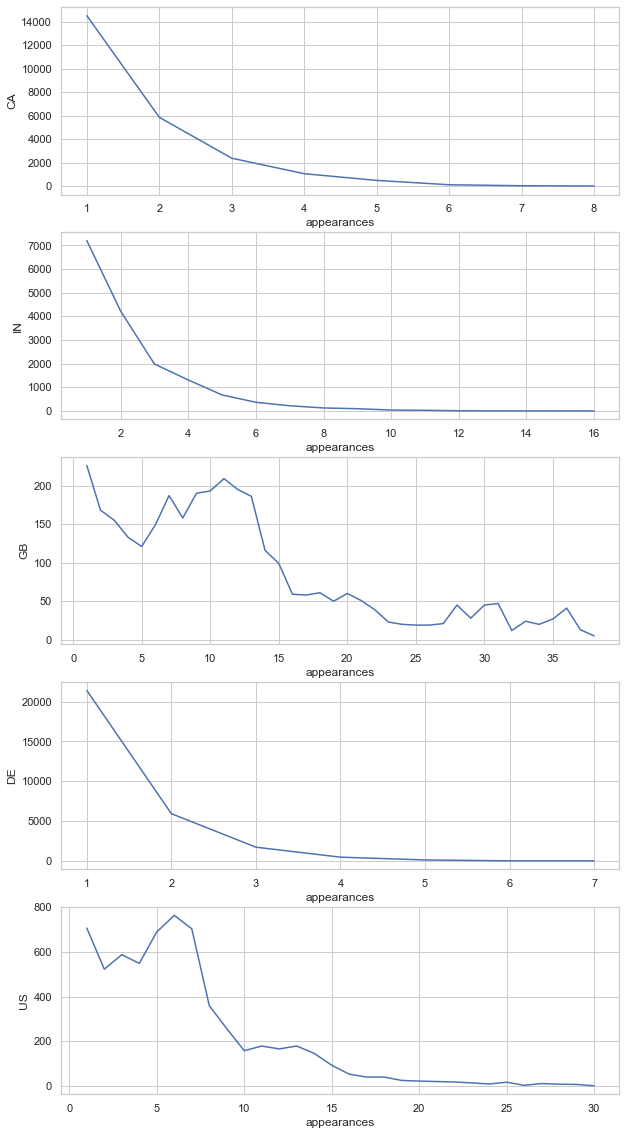

In [156]:
#lets drow the appearances of videos among countries

countries = all_data.country.unique()

video_list = list()

for country in countries:
    video_list.append(appearance_df[appearance_df['country'] == country]['title'].value_counts().sort_index())

fig, [ax0, ax1, ax2, ax3, ax4] = plt.subplots(nrows=5,figsize=(10, 20))


for i, pt in enumerate([ax0, ax1, ax2, ax3, ax4]):
    pt.plot(video_list[i].index, video_list[i])
    pt.set_xlabel("appearances")
    pt.set_ylabel(countries[i])
                  
plt.subplots


## Ratio of YT Trending Videos Among Countries

In [30]:

labels = all_data.groupby(['country']).count().index
sizes = all_data.groupby(['country']).count()['title']
sizes


country
CA    19846
DE    25359
GB     3105
IN    15636
US     5319
Name: title, dtype: int64

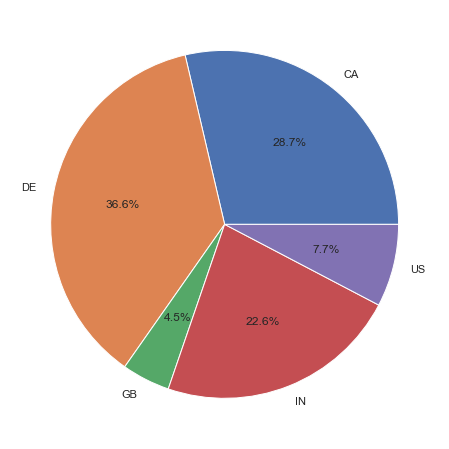

In [15]:
#pie chart of countries
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.show()

## Burada ülke kırılımlı view like dislike barplot olusturmaya calıscam:
bir bar plot  o ulkeye ait metikleri gösterecek toplamda 5 barplot olacak fakat kodda bir hta aldıgım icin ilerleyemiyorum

In [99]:
columns = ['views', 'likes', 'dislikes', 'comment_count']

newdata = list()

for column in columns:
    for country in all_data.country.unique():
        newdata.append(all_data[all_data.groupby(by='country').sum()[column].loc[country]])
newdata
      


KeyError: 10559041631

## Question : Users like videos from which CATEGORY the most?


Burada ülke ülke ayrı kod yazarak istediğim sonuca ulaşıyorum fakat tüm ülkeleri tek bir kodda calıstırabileceğim kodda hata alıyorum

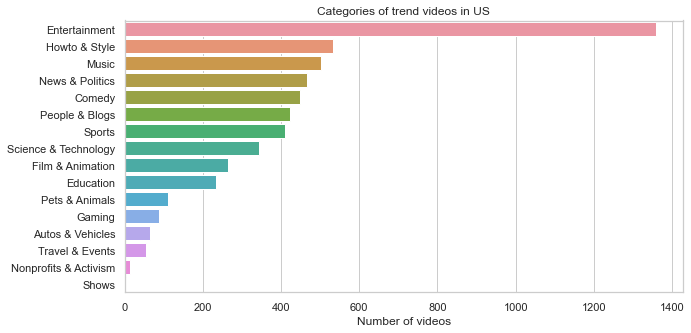

In [135]:
cat_df_us = all_data[all_data['country'] == 'US']['category'].value_counts()
plt.figure(figsize = (10,5))

sns.barplot(cat_df_us, cat_df_us.index)

plt.xlabel('Number of videos')
plt.title('Categories of trend videos in US')
plt.show()


AttributeError: 'AxesSubplot' object has no attribute 'barplot'

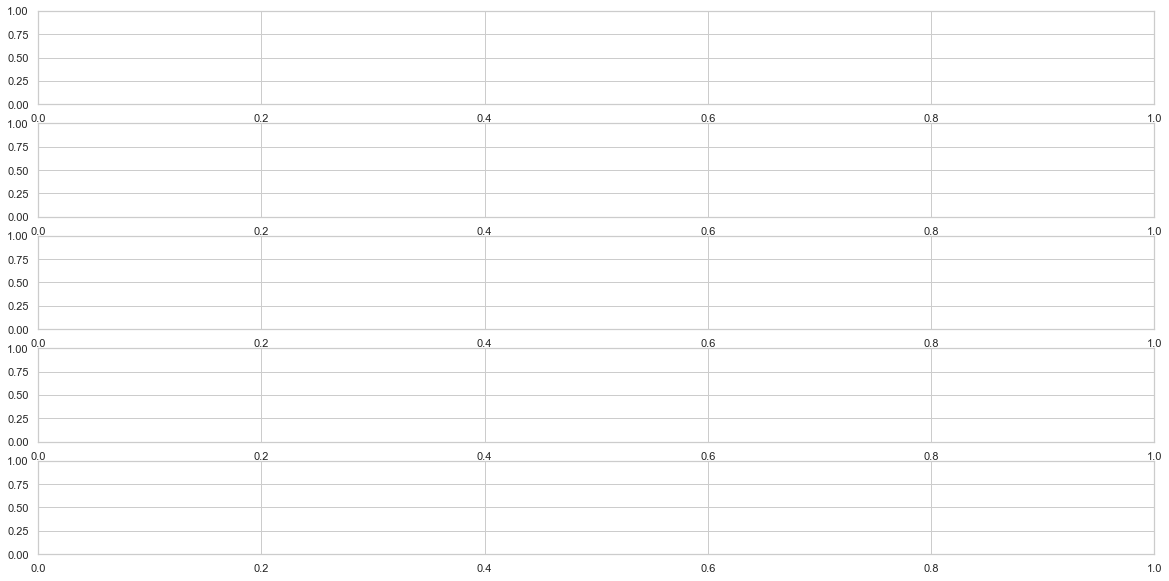

In [161]:
countries = all_data.country.unique()

cat_list = list()

for country in countries:
    cat_list.append(all_data[all_data['country'] == country]['category'].value_counts())

# Set up the matplotlib figure                    
fig, [ax0, ax1, ax2, ax3, ax4] = plt.subplots(nrows=5,figsize=(20, 10))
                    
                    
for i, ax in enumerate([ax0, ax1, ax2, ax3, ax4]):
    sns.barplot(cat_list[i], cat_list[i].index, ax=ax[i])
    plt.xlabel('Number of videos')
    plt.title('Categories of trend videos in {}'.format(countries[i]))
                    
plt.show()


## What's the most discuss words for top categories?

In [190]:
def wcloud(data,bgcolor):
    plt.figure(figsize = (12,5))
    cloud = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    cloud.generate(' '.join(data))
    plt.imshow(cloud)
    plt.axis('off')


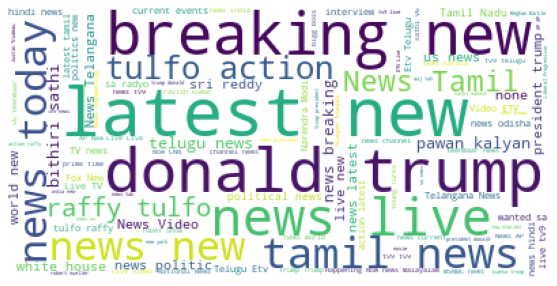

In [191]:
#News & Politics

tags_wordss = all_data[all_data['category']=='News & Politics']['tags']

wcloud(tags_wordss,'white')

In [193]:
#kategorilerden ilk 4 tanesi en fazla trend olan kategori oldugu için sadece onlarda gecen tagleri analiz edeceğim 
#fakat yine for dongusunde bir hata alıyorum

categories = all_data.category.unique()[:4]

tag_list= ()

for cat in categories:
    tag_list.append(all_data[all_data['category']== cat]['tags'])

wcloud(tag_list,'white')


AttributeError: 'tuple' object has no attribute 'append'

## Analysis : Videos from which category has longer trend?


Getting the days on trend for videos

In [197]:
all_df_first = all_df_full.reset_index().drop_duplicates('video_id', keep = 'first').set_index('video_id')

In [212]:
diff_first = (all_df_first['trending_date'].astype('datetime64[ns]')- all_df_first['publish_date'].astype('datetime64[ns]'))
diff_first = diff_first.reset_index()
diff_first.columns = ['video_id','publish_to_trend']
